In [100]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

In [101]:
#Carregar os dados
dados_crus = pd.read_csv('doacao.csv', header = 0, 
                          na_values = "?", comment='\t', 
                          sep=",", skipinitialspace=True)

dataset = dados_crus.copy()
dataset

,Recencia,Frequencia,Quantidade,Tempo,Doou
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,23,2,500,38,0
6,21,2,500,52,0
7,23,3,750,62,0
8,39,1,250,39,0
9,72,1,250,72,0


In [102]:
#Separar em Sim doou e Não doou
df_SIM = dataset[dataset['Doou']==1]
df_NAO = dataset[dataset['Doou']==0]

#Olhar se tem os mesmos valores de SIM e NÃO
print(len(df_SIM))
print(len(df_NAO))

4
6


In [103]:
#Reduzir o numero da NAO para ficar igual ao SIM
df_NAO_RED = resample(df_NAO,
                      replace = False,
                      n_samples = len(df_SIM),
                      random_state = 42
                      )

len(df_NAO_RED)

4

In [104]:
#Juntar novamente os dados apos a redução
df_novo = pd.concat([df_SIM, df_NAO_RED])
len(df_novo)

8

In [105]:
#Separa os dados de entrada (X) e dos dados de saída (y)
X = df_novo.drop('Doou', axis = 1).copy()
y = df_novo['Doou'].copy()

In [106]:
# Centralizar e padronizar os dados
# Cada coluna deve ter média = 0 e desvio padrão = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.10)
X_train_pad = scale(X_train)
X_test_pad = scale(X_test)
print(len(X_train), len(X_test))

7 1


In [107]:
#Incia a construção da SVM
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_pad, y_train)

SVC(random_state=42)

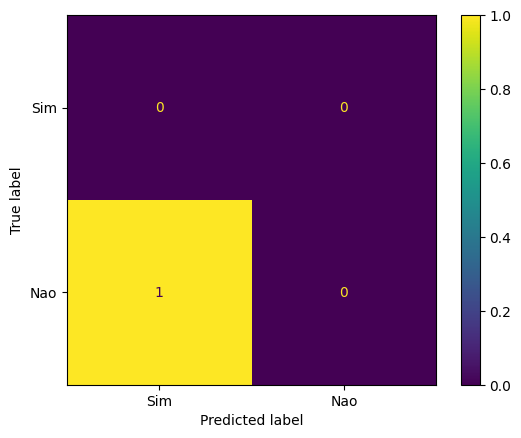

In [108]:
#Matriz de confusão para análisar os dados de teste
ConfusionMatrixDisplay.from_estimator(clf_svm,
                      X_test_pad,
                      y_test,
                      values_format = 'd',
                      display_labels=['Sim', 'Nao'])